<h1 style="text-align:center; color:black;">Weather Analysis and Forecasting</h1>

## Work Overview

This notebook covers the following topics:

- Data Loading
- Data Exploration
- Univariate Analysis
- Multi-variate Analysis
- Feature Selection
- Model training and evaluation


### Data Loading

In [78]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [79]:
data = pd.read_csv('weather.csv')
data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

### Columns Describtion
- Temperature: The ambient temperature, typically measured in degrees Celsius or Fahrenheit.
- Humidity: The amount of moisture in the air, usually expressed as a percentage.
- Wind Speed: The speed of the wind, generally measured in kilometers per hour (km/h) or miles per hour (mph).
- Precipitation (%): The probability of precipitation occurring, given as a percentage.
- Cloud Cover: The fraction of the sky covered by clouds, often represented as a percentage.
- Atmospheric Pressure: The pressure exerted by the atmosphere at a given point, commonly measured in millibars (mb) or inches of mercury (inHg).
- UV Index: A measure of the strength of ultraviolet radiation from the sun, with higher values indicating greater potential for skin damage.
- Season: The time of year, typically categorized as Spring, Summer, Autumn, or Winter.
- Visibility (km): The distance one can clearly see, measured in kilometers.
- Location: The geographic location where the data was recorded.
- Weather Type: A categorical description of the weather, such as Sunny, Rainy, Snowy, etc.

### Data Exploration

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [81]:
data.shape

(13200, 11)

In [82]:
# Checking dublicated rows
data.duplicated().sum()

0

In [83]:
# Checking null values
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [84]:
# Statistical Measurements
data.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

### Univariate Analysis

In [85]:
def univariate(category, title):
    cat = category.value_counts()
    fig = px.bar(
        x=cat.index, 
        y=cat.values,
        color=cat.index, 
        labels={"x": category.name, "y": "Counts"},
    )
    
    fig.update_layout(
        title_text=title,  # Set the title parameter here
        title_x=0.5,  # Center align the title
        title_font_size=25,  # Adjust title font size
        title_font_family='Arial',  # Adjust title font family
        title_font_color='black'  # Adjust title font color
    )
    
    fig.show()

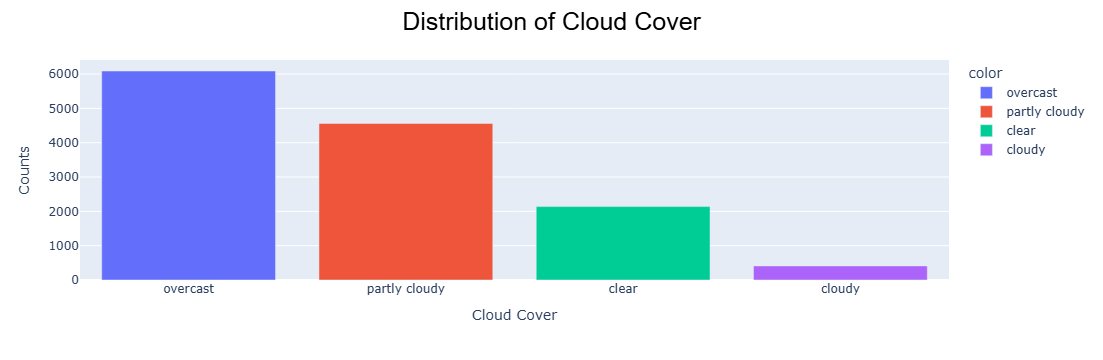

In [86]:
univariate(data['Cloud Cover'],'Distribution of Cloud Cover')

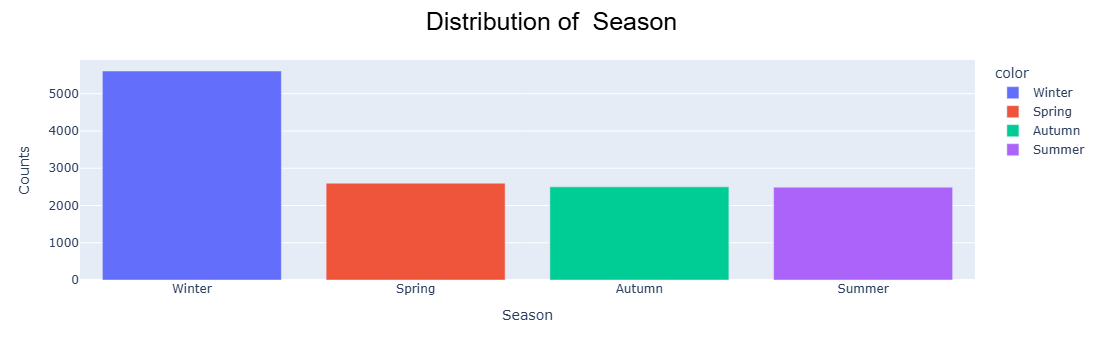

In [87]:
univariate(data['Season'],'Distribution of  Season')

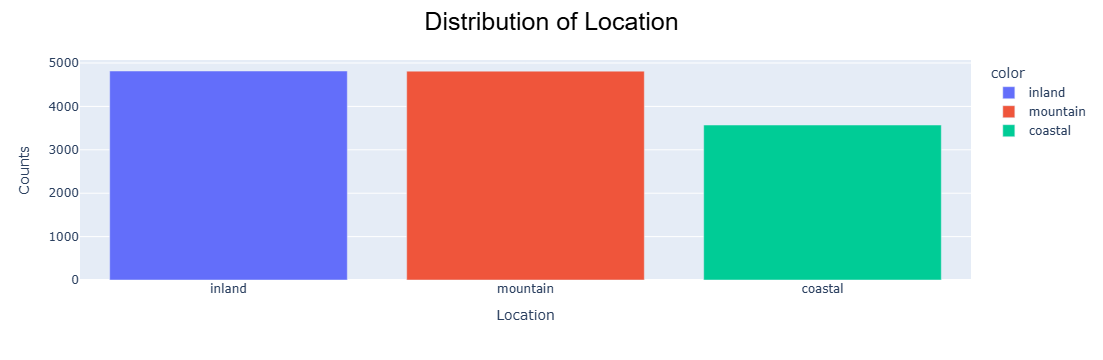

In [88]:
univariate(data['Location'],'Distribution of Location')

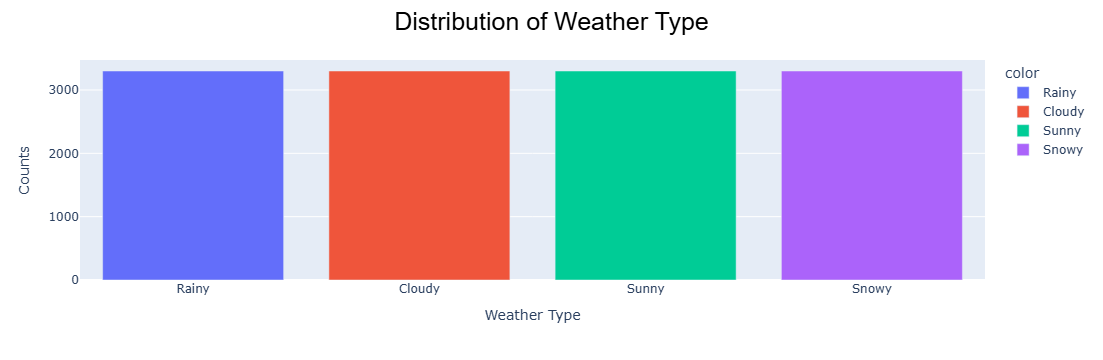

In [89]:
univariate(data['Weather Type'],'Distribution of Weather Type')

In [90]:
def histogram ( data , x,title):
    fig = px.histogram(data , x )
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

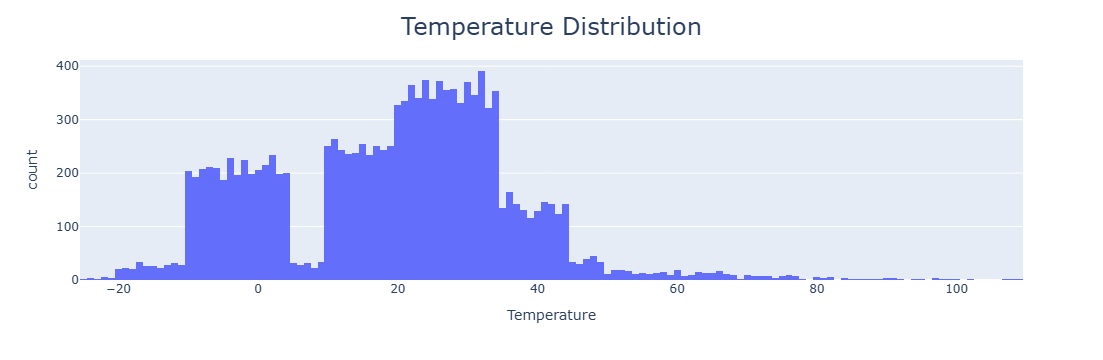

In [91]:
histogram(data , x = "Temperature", title="Temperature Distribution")

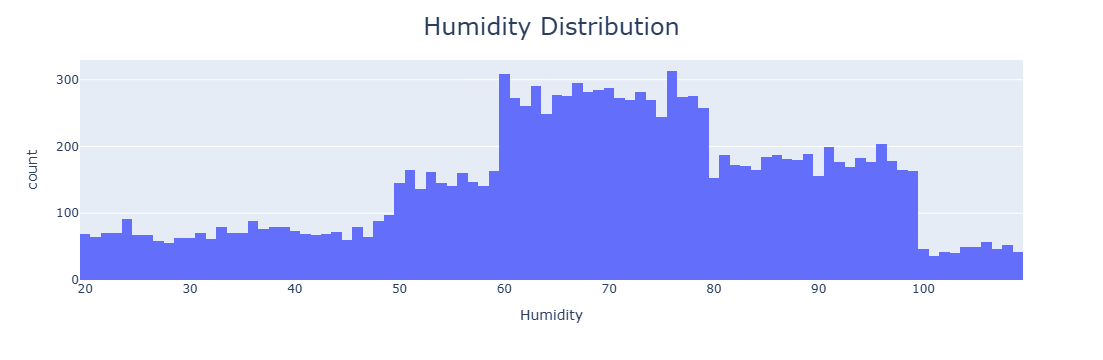

In [92]:
histogram(data , x = "Humidity", title="Humidity Distribution")

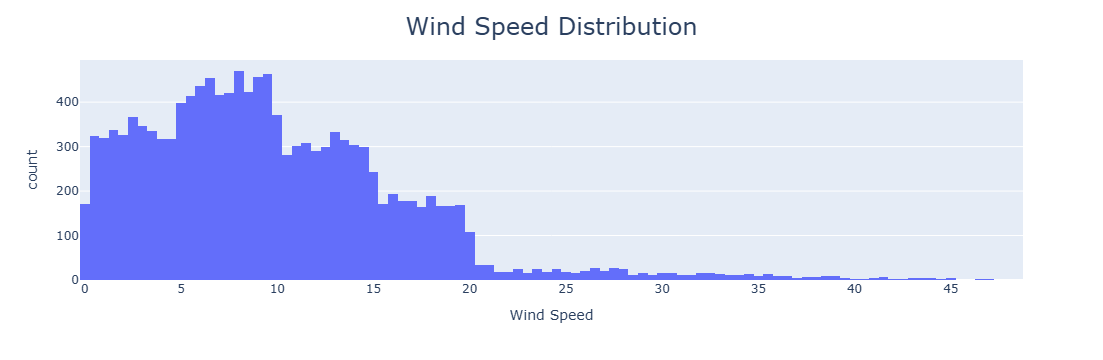

In [93]:
histogram(data , x = "Wind Speed", title="Wind Speed Distribution")

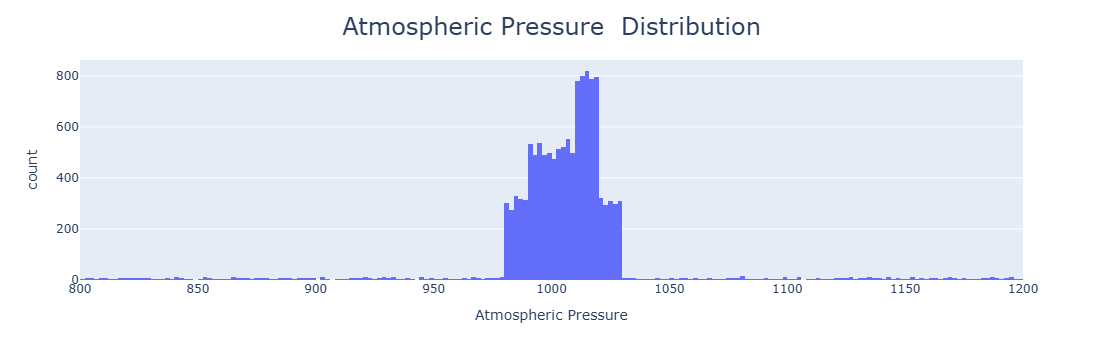

In [94]:
histogram(data , x = "Atmospheric Pressure", title="Atmospheric Pressure  Distribution")

### Multivariate Analysis

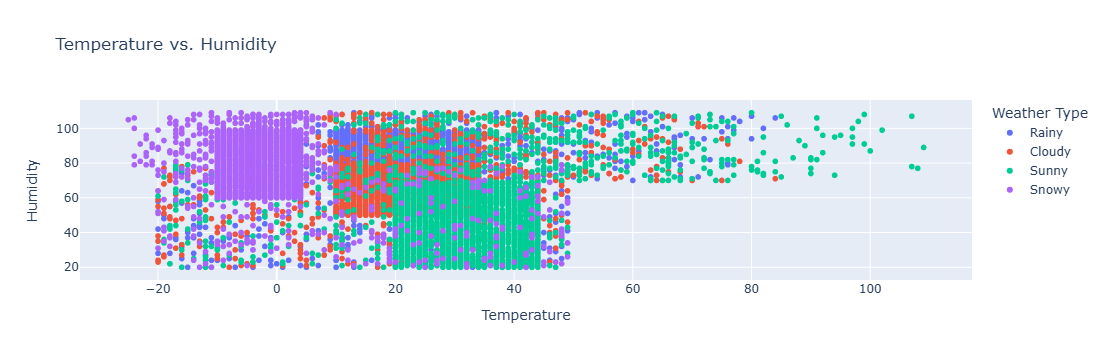

In [95]:
fig = px.scatter(data, x='Temperature', y='Humidity', color='Weather Type', title='Temperature vs. Humidity')
fig.show()

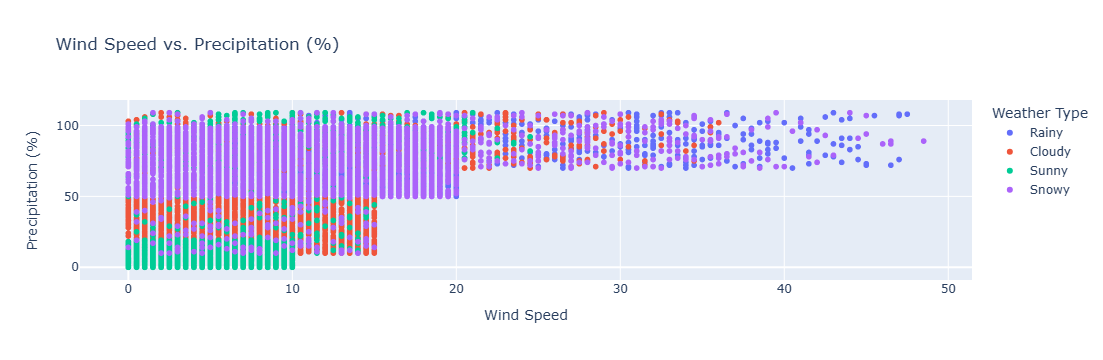

In [96]:
fig = px.scatter(data, x='Wind Speed', y='Precipitation (%)', color='Weather Type', title='Wind Speed vs. Precipitation (%)')
fig.show()


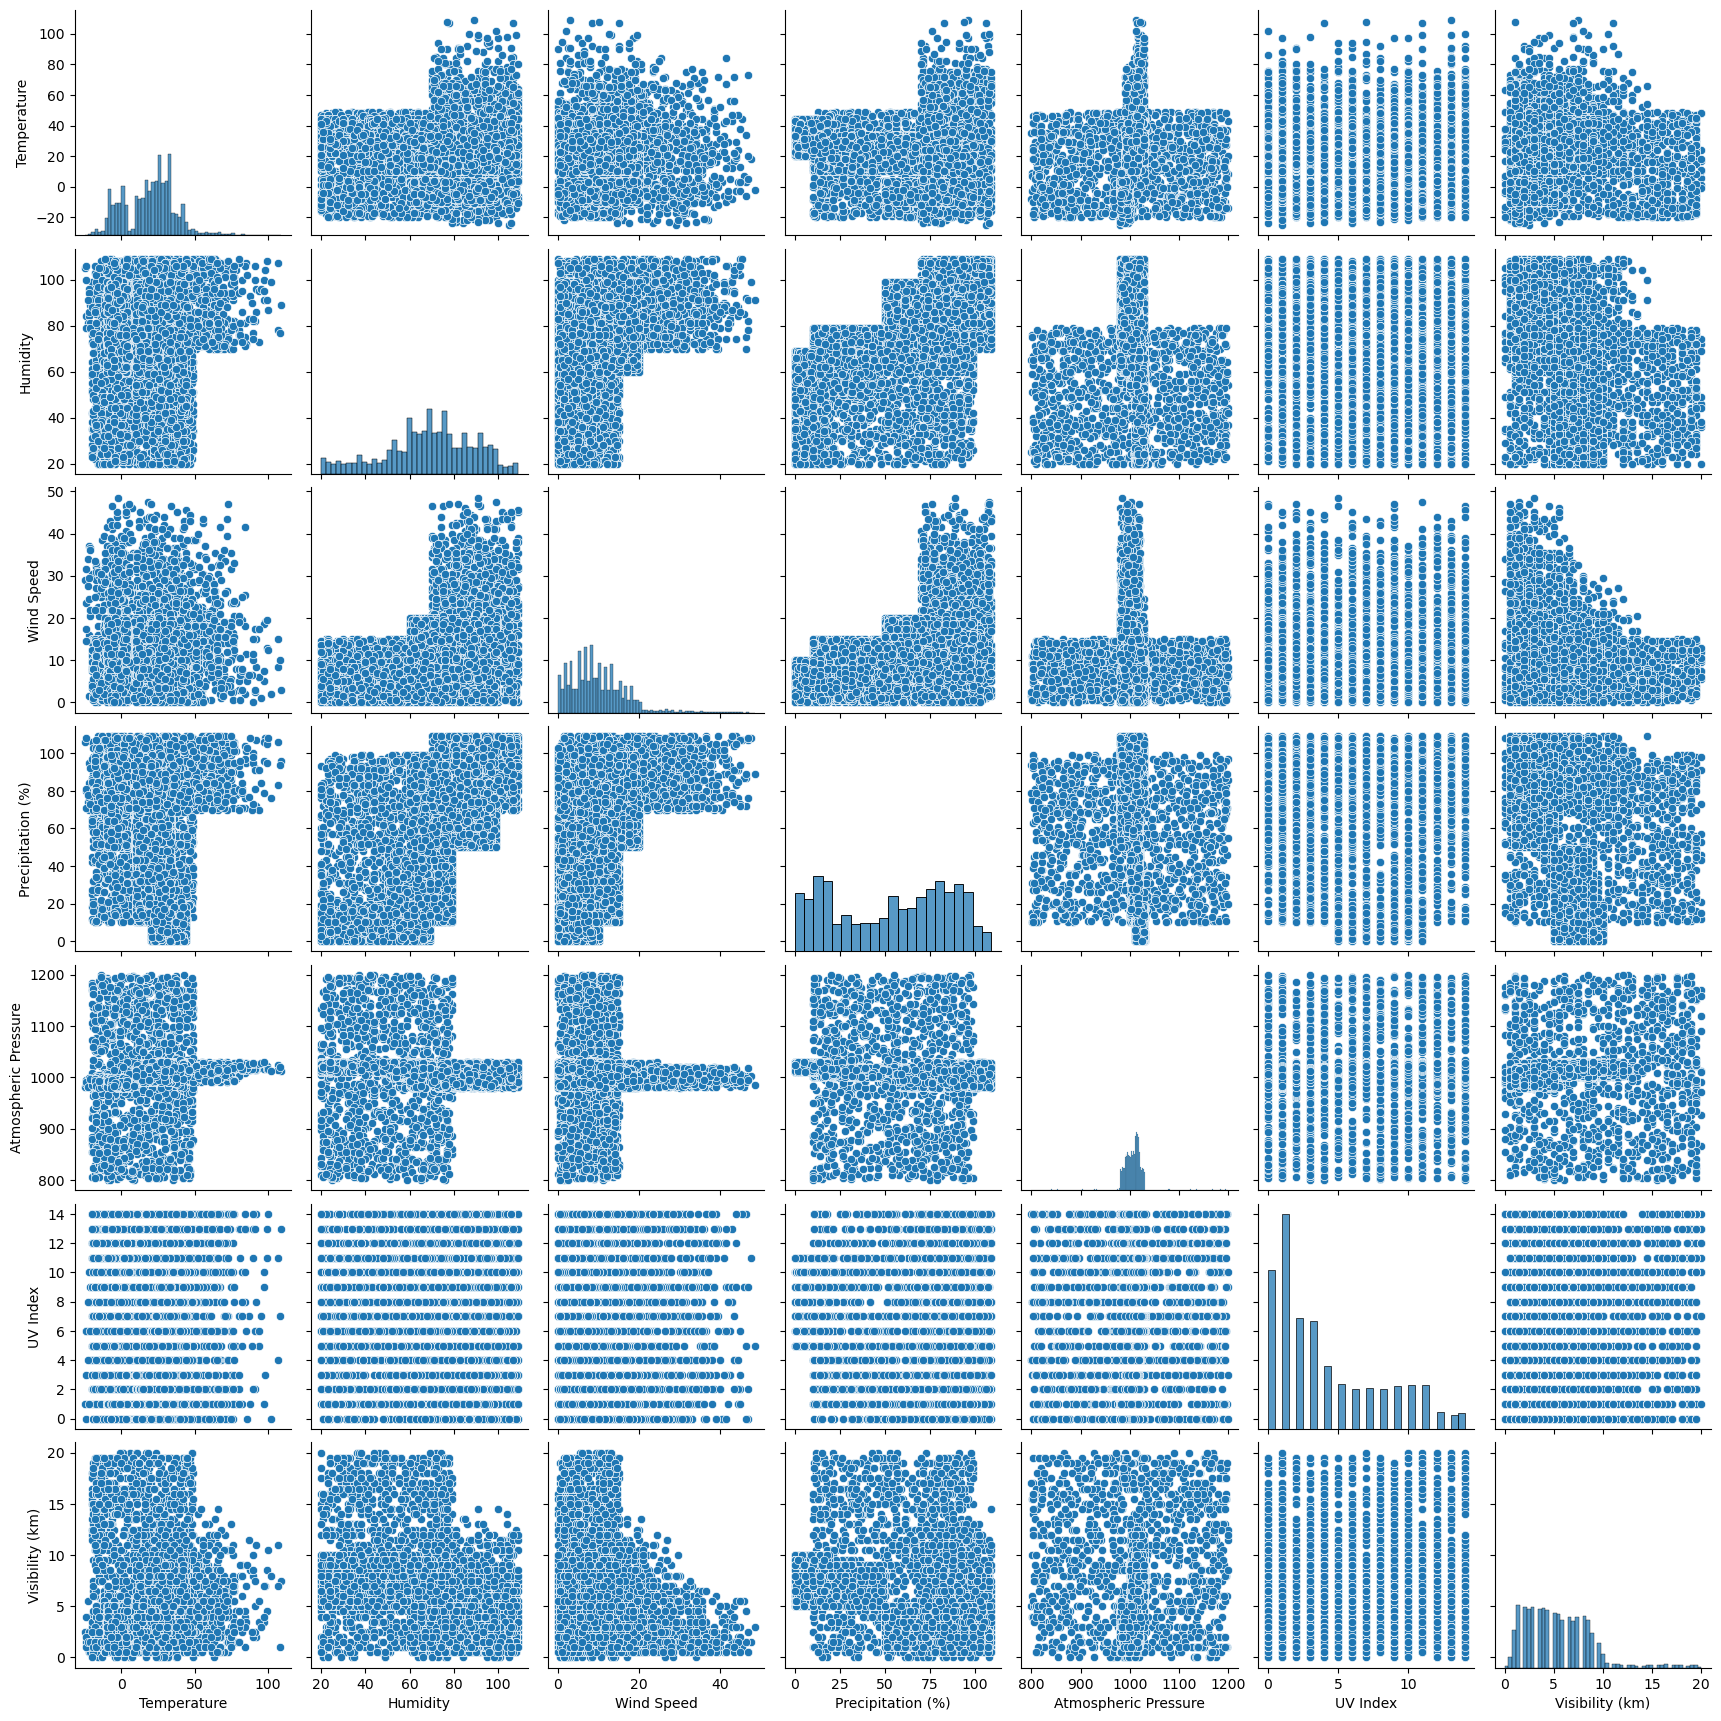

In [97]:
sns.pairplot(data)

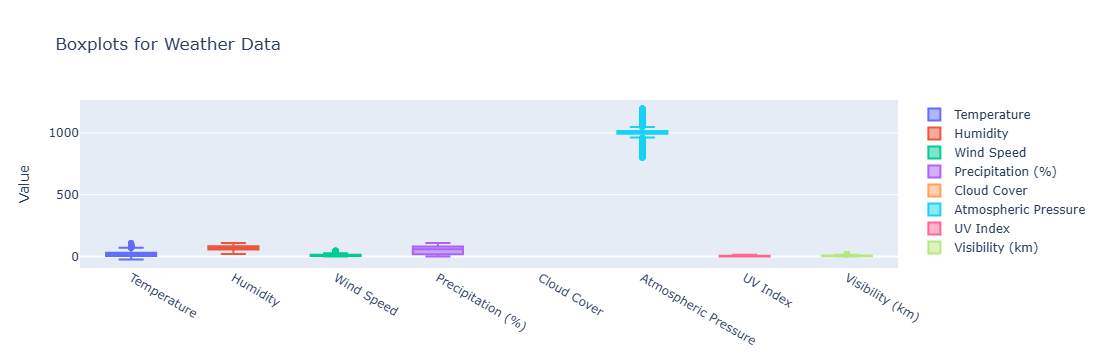

In [98]:
fig = go.Figure()

fig.add_trace(go.Box(y=data['Temperature'], name='Temperature'))
fig.add_trace(go.Box(y=data['Humidity'], name='Humidity'))
fig.add_trace(go.Box(y=data['Wind Speed'], name='Wind Speed'))
fig.add_trace(go.Box(y=data['Precipitation (%)'], name='Precipitation (%)'))
fig.add_trace(go.Box(y=data['Cloud Cover'], name='Cloud Cover'))
fig.add_trace(go.Box(y=data['Atmospheric Pressure'], name='Atmospheric Pressure'))
fig.add_trace(go.Box(y=data['UV Index'], name='UV Index'))
fig.add_trace(go.Box(y=data['Visibility (km)'], name='Visibility (km)'))

fig.update_layout(title='Boxplots for Weather Data', yaxis_title='Value')
fig.show()

### Data Preprocessing

In [99]:
# Handling Outliers
def handle_outliers(df, columns):

    df_clean = df.copy()
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
        
    return df_clean

In [102]:
def label_encode_categorical_columns(df):

    le = LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    
    return df

In [104]:
new_data = label_encode_categorical_columns(data)
new_data.sample(5)

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
12218         40.0        66         3.5               13.0            0   
5722          22.0        52         0.5                8.0            3   
9799          19.0        70         6.0               64.0            3   
5591          45.0        78        17.5               77.0            0   
12522         22.0        33         1.5               13.0            3   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
12218               1018.70        11       2              6.5         1   
5722                1018.60        10       2              7.5         2   
9799                1004.27         1       0              4.5         0   
5591                1016.75         4       3              2.0         1   
12522               1010.66         6       0              9.0         1   

       Weather Type  
12218             3  
5722              3  
9799              1  
5591              3  
12522             3

In [105]:
columns_to_clean = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
df_cleaned = handle_outliers(data, columns_to_clean)

### Feature Selection

In [106]:
correlation_matrix = data.corr()
correlation_matrix

Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Cloud Cover             -0.224642  0.277199    0.183863           0.267368   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Season                  -0.377942  0.189145    0.058676           0.210372   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   
Location                -0.196108  0.079968    0.014091           0.091911   
Weather Type             0.028923 -0.250558   -0.166485          -0.161578   

                      Cloud Cover  Atmospheric Pressure  UV Index    Season  \
Temperature             -0.224642              0.209188  0.374773 -0.377942   
Humidity                 0.277199             -0.120653 -0.342694  0.189145   
Wind Speed               0.183863             -0.077757 -0.068147  0.058676   
Precipitation (%)        0.267368             -0.177444 -0.291601  0.210372   
Cloud Cover              1.000000             -0.096133 -0.347301  0.076947   
Atmospheric Pressure    -0.096133              1.000000  0.154128 -0.126795   
UV Index                -0.347301              0.154128  1.000000 -0.201870   
Season                   0.076947             -0.126795 -0.201870  1.000000   
Visibility (km)         -0.169604              0.120182  0.362922 -0.231691   
Location                 0.030464             -0.077053 -0.100510  0.147115   
Weather Type            -0.536681              0.030679  0.345804  0.118791   

                      Visibility (km)  Location  Weather Type  
Temperature                  0.250751 -0.196108      0.028923  
Humidity                    -0.479969  0.079968     -0.250558  
Wind Speed                  -0.311828  0.014091     -0.166485  
Precipitation (%)           -0.457444  0.091911     -0.161578  
Cloud Cover                 -0.169604  0.030464     -0.536681  
Atmospheric Pressure         0.120182 -0.077053      0.030679  
UV Index                     0.362922 -0.100510      0.345804  
Season                      -0.231691  0.147115      0.118791  
Visibility (km)              1.000000 -0.093642      0.047448  
Location                    -0.093642  1.000000      0.071665  
Weather Type                 0.047448  0.071665      1.000000

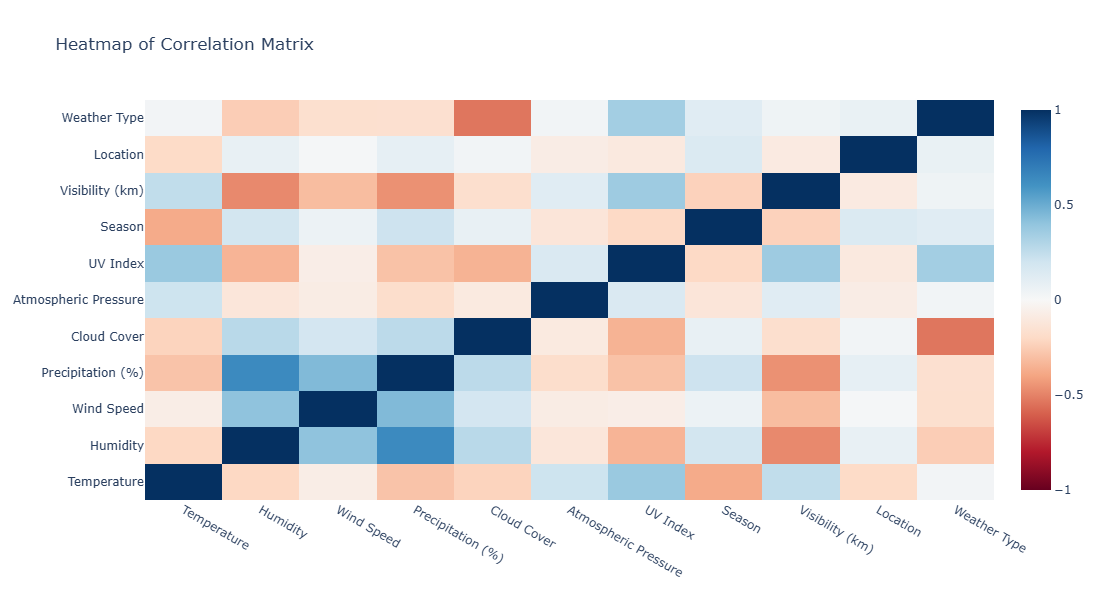

In [107]:
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
))

fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_nticks=36,
    width=600,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()

In [108]:
x = data.drop('Weather Type', axis=1)
x

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0             14.0        73         9.5               82.0            3   
1             39.0        96         8.5               71.0            3   
2             30.0        64         7.0               16.0            0   
3             38.0        83         1.5               82.0            0   
4             27.0        74        17.0               66.0            2   
...            ...       ...         ...                ...          ...   
13195         10.0        74        14.5               71.0            2   
13196         -1.0        76         3.5               23.0            1   
13197         30.0        77         5.5               28.0            2   
13198          3.0        76        10.0               94.0            2   
13199         -5.0        38         0.0               92.0            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
0                   1010.82         2       3              3.5         1  
1                   1011.43         7       1             10.0         1  
2                   1018.72         5       1              5.5         2  
3                   1026.25         7       1              1.0         0  
4                    990.67         1       3              2.5         2  
...                     ...       ...     ...              ...       ...  
13195               1003.15         1       2              1.0         2  
13196               1067.23         1       3              6.0         0  
13197               1012.69         3       0              9.0         0  
13198                984.27         0       3              2.0         1  
13199               1015.37         5       0             10.0         2  

[13200 rows x 10 columns]

In [109]:
y = data['Weather Type']
y

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int32

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
print(f'The shape of X train{x_train.shape}')
print(f'The shape of Y train{y_train.shape}')
print(f'The shape of X test{x_test.shape}')
print(f'The shape of Y test{y_test.shape}')

The shape of X train(10560, 10)
The shape of Y train(10560,)
The shape of X test(2640, 10)
The shape of Y test(2640,)


### Model Training and Evaluation

In [112]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [113]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [114]:
y_pred = model.predict(x_test)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9106060606060606
Confusion Matrix:
 [[582  34  14  21]
 [ 38 586  10  13]
 [ 20  11 660  10]
 [ 31  11  23 576]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       651
           1       0.91      0.91      0.91       647
           2       0.93      0.94      0.94       701
           3       0.93      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



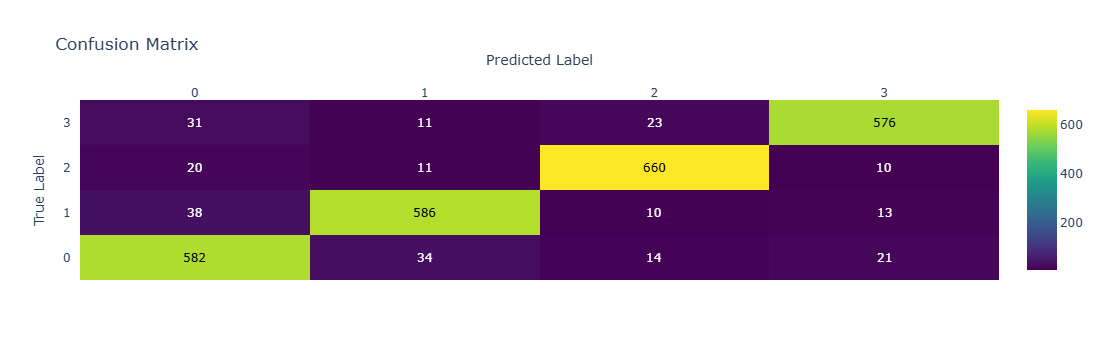

In [116]:
import plotly.figure_factory as ff

# Create labels based on the number of unique classes in y_test
labels = sorted(y_test.unique())

fig = ff.create_annotated_heatmap(z=conf_matrix, 
                                  x=labels, 
                                  y=labels, 
                                  colorscale='Viridis',
                                  showscale=True)

fig.update_layout(title="Confusion Matrix", 
                  xaxis_title="Predicted Label", 
                  yaxis_title="True Label")

fig.show()

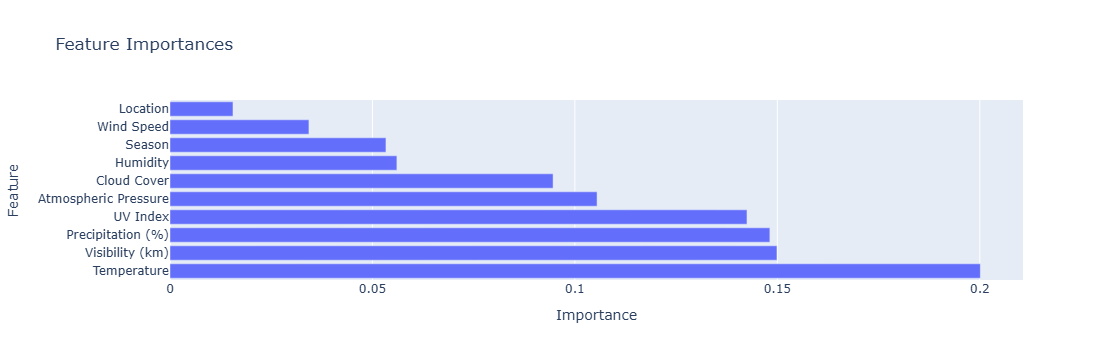

In [117]:
feature_importances = model.feature_importances_
features = x.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

fig = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importances', orientation='h')
fig.show()
